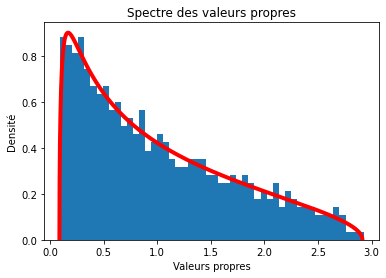

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Definition of the Marchenko-Pastur density
def marchenko_pastur_pdf(x,Q,sigma=1):
    y=1/Q
    b=np.power(sigma*(1 + np.sqrt(1/Q)),2) # Largest eigenvalue
    a=np.power(sigma*(1 - np.sqrt(1/Q)),2) # Smallest eigenvalue
    return (1/(2*np.pi*sigma*sigma*x*y))*np.sqrt((b-x)*(x-a))*(0 if (x > b or x <a ) else 1)

def compare_eigenvalue_distribution(correlation_matrix, Q, sigma=1, set_autoscale = True, show_top = True):
    e, _ = np.linalg.eig(correlation_matrix) # Correlation matrix is Hermitian, so this is faster
                               # than other variants of eig

    x_min = .0001 if np.power(sigma*(1 - np.sqrt(1/Q)),2) < .0001 else np.power(sigma*(1 - np.sqrt(1/Q)),2)
    x_max = np.power(sigma*(1 + np.sqrt(1/Q)),2)

    fig = plt.figure()
    ax  = fig.add_subplot(111)
    bins = 50
    if not show_top:
        # Clear top eigenvalue from plot
        e=e[ e <= x_max+1]
    ax.hist(e, density = True, bins=bins) # Histogram the eigenvalues
    ax.set_autoscale_on(set_autoscale)

    # Plot the theoretical density
    f = np.vectorize(lambda x : marchenko_pastur_pdf(x,Q,sigma=sigma))

    x_min = .0001 if np.power(sigma*(1 - np.sqrt(1/Q)),2) < .0001 else np.power(sigma*(1 - np.sqrt(1/Q)),2)
    x_max = np.power(sigma*(1 + np.sqrt(1/Q)),2)

    x = np.linspace(x_min,x_max,5000)
    ax.plot(x,f(x), linewidth=4, color = 'r')
    ax.set_xlabel('Valeurs propres')
    ax.set_ylabel('Densité')
    ax.set_title('Spectre des valeurs propres')

# Create the correlation matrix and find the eigenvalues
N= 500
T= 1000
X= np.random.normal(0,1,size=(N,T))
cor = np.corrcoef(X)
Q= T/N
compare_eigenvalue_distribution(cor, Q)

In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

spy = pdr.get_data_yahoo('TSLA', start='2022-10-24', end='2022-12-23')

print(spy)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-24  205.820007  213.500000  198.589996  211.250000  211.250000   
2022-10-25  210.100006  224.350006  210.000000  222.419998  222.419998   
2022-10-26  219.399994  230.600006  218.199997  224.639999  224.639999   
2022-10-27  229.770004  233.809998  222.850006  225.089996  225.089996   
2022-10-28  225.399994  228.860001  216.350006  228.520004  228.520004   
2022-10-31  226.190002  229.850006  221.940002  227.539993  227.539993   
2022-11-01  234.050003  237.399994  227.279999  227.820007  227.820007   
2022-11-02  226.039993  227.869995  214.820007  214.979996  214.979996   
2022-11-03  211.360001  221.199997  210.139999  215.309998  215.309998   
2022-11-04  222.600006  223.800003  203.080002  207.470001  207.470001   
2022-11-07  208.649994  208.899994  196.660

In [3]:
tickers = pd.read_csv('nasdaq_tickers_all.csv', header=None)[0]
tickers = np.random.choice(tickers.values[1:], size=100, replace=False) # Choose a random set of headers
tickers

array(['CAL', 'SAY', 'TMC', 'GLMD', 'PLAB', 'OPK', 'HSCSW', 'CLMT',
       'ROSE', 'ATMC', 'OPHC', 'DEA', 'SLAM', 'HHLA', 'EVE', 'SGII',
       'MNOV', 'VRRM', 'NAD', 'NM', 'NRAC', 'NUV', 'XFOR', 'LSEAW',
       'ANPC', 'RYI', 'TWOU', 'CTRM', 'UCL', 'DSX', 'HAE', 'PRTG', 'SD',
       'GKOS', 'CGO', 'LBRDP', 'LGIH', 'XBIO', 'CLB', 'GNL', 'OCEAW',
       'AHL^E', 'BCE', 'HURN', 'BAC^K', 'DHF', 'NEO', 'VECO', 'IBM',
       'MNSO', 'IPX', 'FLWS', 'FRT^C', 'PEV', 'EVER', 'WF', 'TFC^O',
       'CLPS', 'ICMB', 'CTIB', 'ZION', 'NVT', 'CVLG', 'DUOL', 'FAMI',
       'DRQ', 'TDS^V', 'ADILW', 'JEF', 'ALNY', 'ABSI', 'WFC^Z', 'HHGCR',
       'PMVP', 'AHL^D', 'LCW', 'DUKB', 'CELH', 'BLBX', 'NCRA', 'TRONU',
       'ZIONP', 'ENOB', 'KEQU', 'MDT', 'SAIC', 'FIVN', 'PNRG', 'SSBK',
       'CEAD', 'BMN', 'OB', 'THCH', 'KACL', 'TKR', 'HCNE', 'LMNL', 'DRMA',
       'ALKT', 'KRO'], dtype=object)

In [4]:
#tickers = tickers.values[1:]
tickers

array(['CAL', 'SAY', 'TMC', 'GLMD', 'PLAB', 'OPK', 'HSCSW', 'CLMT',
       'ROSE', 'ATMC', 'OPHC', 'DEA', 'SLAM', 'HHLA', 'EVE', 'SGII',
       'MNOV', 'VRRM', 'NAD', 'NM', 'NRAC', 'NUV', 'XFOR', 'LSEAW',
       'ANPC', 'RYI', 'TWOU', 'CTRM', 'UCL', 'DSX', 'HAE', 'PRTG', 'SD',
       'GKOS', 'CGO', 'LBRDP', 'LGIH', 'XBIO', 'CLB', 'GNL', 'OCEAW',
       'AHL^E', 'BCE', 'HURN', 'BAC^K', 'DHF', 'NEO', 'VECO', 'IBM',
       'MNSO', 'IPX', 'FLWS', 'FRT^C', 'PEV', 'EVER', 'WF', 'TFC^O',
       'CLPS', 'ICMB', 'CTIB', 'ZION', 'NVT', 'CVLG', 'DUOL', 'FAMI',
       'DRQ', 'TDS^V', 'ADILW', 'JEF', 'ALNY', 'ABSI', 'WFC^Z', 'HHGCR',
       'PMVP', 'AHL^D', 'LCW', 'DUKB', 'CELH', 'BLBX', 'NCRA', 'TRONU',
       'ZIONP', 'ENOB', 'KEQU', 'MDT', 'SAIC', 'FIVN', 'PNRG', 'SSBK',
       'CEAD', 'BMN', 'OB', 'THCH', 'KACL', 'TKR', 'HCNE', 'LMNL', 'DRMA',
       'ALKT', 'KRO'], dtype=object)

In [5]:
prices = pd.DataFrame()

In [6]:
#prices['ie'] = 5

In [7]:
prices

""


In [8]:
#yfin.pdr_override()
for ticker in tickers:

    print(ticker)
    try:
        prices[ticker] = pdr.get_data_yahoo(ticker, start='2021-01-01', end='2022-12-31')['Close']
        
    except Exception as e:
        pass
    
#returns = prices.pct_change()


CAL
[*********************100%***********************]  1 of 1 completed
SAY
[*********************100%***********************]  1 of 1 completed
TMC
[*********************100%***********************]  1 of 1 completed
GLMD
[*********************100%***********************]  1 of 1 completed
PLAB
[*********************100%***********************]  1 of 1 completed
OPK
[*********************100%***********************]  1 of 1 completed
HSCSW
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HSCSW: No data found for this date range, symbol may be delisted
CLMT
[*********************100%***********************]  1 of 1 completed
ROSE
[*********************100%***********************]  1 of 1 completed
ATMC
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ATMC: Data doesn't exist for startDate = 1609455600, endDate = 1672441200
OPHC
[*********************100%***********************]  1 of 1 completed
DEA
[*

[*********************100%***********************]  1 of 1 completed
ALKT
[*********************100%***********************]  1 of 1 completed
KRO
[*********************100%***********************]  1 of 1 completed


In [9]:
prices

,CAL,SAY,TMC,GLMD,PLAB,OPK,HSCSW,CLMT,ROSE,ATMC,...,BMN,OB,THCH,KACL,TKR,HCNE,LMNL,DRMA,ALKT,KRO
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,15.650000,NaN,NaN,3.110,11.16,3.95,NaN,3.130000,NaN,NaN,...,NaN,NaN,NaN,NaN,77.360001,NaN,42.000000,NaN,NaN,14.91
2021-01-04,14.530000,NaN,NaN,3.190,10.97,4.20,NaN,3.030000,NaN,NaN,...,NaN,NaN,NaN,NaN,75.540001,NaN,42.799999,NaN,NaN,14.76
2021-01-05,15.030000,NaN,NaN,3.290,11.18,4.25,NaN,3.160000,NaN,NaN,...,NaN,NaN,NaN,NaN,77.809998,NaN,42.700001,NaN,NaN,15.23
2021-01-06,16.090000,NaN,NaN,3.280,11.62,4.40,NaN,3.280000,NaN,NaN,...,NaN,NaN,NaN,NaN,83.260002,NaN,41.599998,NaN,NaN,16.08
2021-01-07,15.660000,NaN,NaN,3.390,11.60,4.48,NaN,3.210000,NaN,NaN,...,NaN,NaN,NaN,NaN,84.870003,NaN,41.299999,NaN,NaN,15.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,21.760000,24.820000,0.550,0.538,16.41,1.14,NaN,12.980000,10.329,NaN,...,25.129999,3.57,3.14,10.35,70.660004,9.93,3.650000,2.912,13.62,9.48
2022-12-27,21.740000,24.871000,0.603,0.540,16.40,1.07,NaN,13.380000,10.340,NaN,...,25.260000,3.45,3.30,10.35,71.349998,9.96,3.580000,3.056,13.17,9.55
2022-12-28,21.170000,24.920000,0.600,0.472,16.17,1.05,NaN,14.160000,10.311,NaN,...,25.000000,3.36,3.25,10.34,69.769997,9.96,3.500000,3.072,13.55,9.22


In [10]:
returns = prices.pct_change()
returns = returns.iloc[1:, :]# Remove first row of NA's generated by pct_changes()
returns.dropna(axis = 1, thresh=len(returns.index)/2, inplace=True) # Drop stocks with over half the data missing
returns.dropna(axis = 0, thresh=len(returns.columns), inplace=True) # Drop days without data for all stocks
training_period = 100
in_sample = returns.iloc[:(returns.shape[0]-training_period), :].copy()
tickers = in_sample.columns # Remove tickers that were dropped

returns.shape #(323, 69)

(269, 81)

In [11]:
returns

,CAL,TMC,GLMD,PLAB,OPK,CLMT,ROSE,OPHC,DEA,SLAM,...,SSBK,CEAD,OB,THCH,TKR,HCNE,LMNL,DRMA,ALKT,KRO
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-07,0.051807,-0.008299,0.061404,0.037956,0.023622,0.020449,-0.000708,0.019048,0.002289,0.000000,...,-0.004065,0.111111,0.033738,0.003068,0.014921,-0.001015,0.161826,0.154545,0.069841,0.004158
2021-12-08,-0.012831,0.033473,-0.033058,0.259494,0.030769,-0.020685,0.001012,0.014019,0.007766,0.000000,...,-0.000765,-0.050000,-0.006527,0.001019,-0.002997,0.000000,-0.026786,-0.003937,-0.015685,0.009662
2021-12-09,-0.030608,-0.048583,-0.021368,-0.016750,-0.037313,-0.023762,0.001011,-0.034562,-0.003626,-0.002045,...,-0.004340,-0.026316,-0.047963,0.002037,-0.016893,-0.004065,-0.055046,-0.039526,-0.047373,-0.003418
2021-12-10,0.006488,-0.089362,0.000000,-0.031800,0.000000,-0.048682,0.002020,0.019093,0.003185,-0.002049,...,0.009744,0.081081,-0.020704,-0.002033,-0.008009,0.000000,-0.029126,-0.049383,-0.006781,-0.000686
2021-12-13,-0.051998,-0.032710,-0.021834,-0.036950,0.005168,-0.041222,0.000000,-0.023419,0.010431,0.001027,...,-0.022346,0.000000,-0.038760,0.001018,-0.024222,0.000000,-0.081000,0.064935,-0.040510,-0.015786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.012564,-0.035088,-0.088136,-0.007860,-0.033898,0.006202,0.000000,0.068354,0.013738,0.001984,...,-0.003965,-0.011628,0.011331,-0.105413,0.007557,0.000000,-0.013514,0.022472,-0.013044,0.028199
2022-12-27,-0.000919,0.096364,0.003718,-0.000609,-0.061403,0.030817,0.001065,-0.056872,0.007846,-0.000990,...,-0.004343,-0.002353,-0.033613,0.050955,0.009765,0.003021,-0.019178,0.049451,-0.033040,0.007384
2022-12-28,-0.026219,-0.004975,-0.125926,-0.014024,-0.018692,0.058296,-0.002805,-0.005025,-0.012739,0.002973,...,-0.007270,-0.021226,-0.026087,-0.015152,-0.022144,0.000000,-0.022346,0.005236,0.028853,-0.034555


In [12]:
import numpy as np
    
log_in_sample = in_sample.apply(lambda x : np.log(x+1))

In [13]:
log_in_sample

,CAL,TMC,GLMD,PLAB,OPK,CLMT,ROSE,OPHC,DEA,SLAM,...,SSBK,CEAD,OB,THCH,TKR,HCNE,LMNL,DRMA,ALKT,KRO
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-07,0.050509,-0.008333,0.059592,0.037254,0.023347,0.020242,-0.000708,0.018869,0.002287,0.000000,...,-0.004073,0.105360,0.033182,0.003063,0.014811,-0.001016,0.149993,0.143707,0.067510,0.004149
2021-12-08,-0.012914,0.032925,-0.033617,0.230710,0.030305,-0.020902,0.001012,0.013921,0.007736,0.000000,...,-0.000766,-0.051293,-0.006549,0.001019,-0.003002,0.000000,-0.027151,-0.003945,-0.015809,0.009615
2021-12-09,-0.031086,-0.049803,-0.021599,-0.016892,-0.038027,-0.024049,0.001011,-0.035174,-0.003633,-0.002047,...,-0.004349,-0.026668,-0.049152,0.002035,-0.017038,-0.004073,-0.056619,-0.040328,-0.048532,-0.003424
2021-12-10,0.006467,-0.093609,0.000000,-0.032317,0.000000,-0.049906,0.002018,0.018913,0.003180,-0.002051,...,0.009696,0.077962,-0.020921,-0.002035,-0.008041,0.000000,-0.029559,-0.050644,-0.006804,-0.000686
2021-12-13,-0.053399,-0.033257,-0.022076,-0.037650,0.005155,-0.042096,0.000000,-0.023698,0.010377,0.001026,...,-0.022600,0.000000,-0.039531,0.001018,-0.024520,0.000000,-0.084469,0.062914,-0.041353,-0.015912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-03,0.018982,-0.043189,0.014185,0.024867,-0.004090,-0.024043,0.000000,0.010554,-0.014523,0.001016,...,-0.011144,0.054808,0.023690,0.000902,0.003928,0.001024,-0.021610,0.184801,0.016507,-0.002277
2022-08-04,0.011446,0.011547,-0.099342,0.010586,-0.016529,0.000760,0.000992,-0.051155,-0.014207,0.002028,...,0.000000,0.013245,0.029656,0.000100,0.009209,0.000000,0.028710,-0.009331,0.057007,-0.061694
2022-08-05,-0.001899,0.077301,-0.020203,-0.018807,-0.051293,0.175842,0.000000,0.043250,-0.004249,-0.001014,...,0.000000,-0.013245,-0.003252,0.000000,-0.000311,0.000000,-0.045846,-0.031749,-0.082570,-0.012195


In [14]:

log_in_sample.dropna(0, inplace= True) #Drop those NA
log_in_sample.dropna(1, inplace = True) 

# We will need the standard deviations later:
variances = np.diag(log_in_sample.cov().values)
standard_deviations = np.sqrt(variances) 

C:\Users\hp\AppData\Local\Temp\ipykernel_23632\2682934409.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  log_in_sample.dropna(0, inplace= True) #Drop those NA
C:\Users\hp\AppData\Local\Temp\ipykernel_23632\2682934409.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  log_in_sample.dropna(1, inplace = True)


In [15]:
variances

array([1.50287150e-03, 5.28511346e-03, 3.80779363e-03, 1.65313649e-03,
       2.21808220e-03, 1.99834976e-03, 7.93338911e-06, 1.22326582e-03,
       1.69365885e-04, 1.97440296e-06, 1.90697566e-06, 2.82795771e-06,
       6.83932714e-04, 5.63391162e-04, 1.10283256e-04, 2.91047446e-03,
       1.83670616e-06, 5.93772571e-05, 5.53830003e-03, 6.71895627e-03,
       1.91824817e-03, 5.78497075e-03, 2.47913454e-03, 6.38695387e-03,
       1.58230749e-03, 7.71135461e-04, 3.87155140e-03, 2.02067404e-03,
       1.20398344e-03, 2.92825262e-04, 9.79580732e-05, 1.08306392e-03,
       1.70390494e-03, 1.45394175e-03, 2.83519793e-04, 1.29413865e-04,
       4.06703574e-04, 1.45807145e-04, 3.43760878e-03, 9.68340028e-04,
       2.25562433e-04, 3.69474740e-03, 2.14492985e-03, 2.05300079e-03,
       5.42366713e-04, 1.61796438e-03, 7.16565847e-04, 2.94655105e-03,
       5.79459070e-04, 3.75641915e-04, 1.10718470e-03, 2.93510942e-03,
       3.12213798e-03, 1.08325239e-03, 5.77569809e-04, 1.99372911e-03,
      

In [16]:
log_in_sample

,CAL,TMC,GLMD,PLAB,OPK,CLMT,ROSE,OPHC,DEA,SLAM,...,SSBK,CEAD,OB,THCH,TKR,HCNE,LMNL,DRMA,ALKT,KRO
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-07,0.050509,-0.008333,0.059592,0.037254,0.023347,0.020242,-0.000708,0.018869,0.002287,0.000000,...,-0.004073,0.105360,0.033182,0.003063,0.014811,-0.001016,0.149993,0.143707,0.067510,0.004149
2021-12-08,-0.012914,0.032925,-0.033617,0.230710,0.030305,-0.020902,0.001012,0.013921,0.007736,0.000000,...,-0.000766,-0.051293,-0.006549,0.001019,-0.003002,0.000000,-0.027151,-0.003945,-0.015809,0.009615
2021-12-09,-0.031086,-0.049803,-0.021599,-0.016892,-0.038027,-0.024049,0.001011,-0.035174,-0.003633,-0.002047,...,-0.004349,-0.026668,-0.049152,0.002035,-0.017038,-0.004073,-0.056619,-0.040328,-0.048532,-0.003424
2021-12-10,0.006467,-0.093609,0.000000,-0.032317,0.000000,-0.049906,0.002018,0.018913,0.003180,-0.002051,...,0.009696,0.077962,-0.020921,-0.002035,-0.008041,0.000000,-0.029559,-0.050644,-0.006804,-0.000686
2021-12-13,-0.053399,-0.033257,-0.022076,-0.037650,0.005155,-0.042096,0.000000,-0.023698,0.010377,0.001026,...,-0.022600,0.000000,-0.039531,0.001018,-0.024520,0.000000,-0.084469,0.062914,-0.041353,-0.015912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-03,0.018982,-0.043189,0.014185,0.024867,-0.004090,-0.024043,0.000000,0.010554,-0.014523,0.001016,...,-0.011144,0.054808,0.023690,0.000902,0.003928,0.001024,-0.021610,0.184801,0.016507,-0.002277
2022-08-04,0.011446,0.011547,-0.099342,0.010586,-0.016529,0.000760,0.000992,-0.051155,-0.014207,0.002028,...,0.000000,0.013245,0.029656,0.000100,0.009209,0.000000,0.028710,-0.009331,0.057007,-0.061694
2022-08-05,-0.001899,0.077301,-0.020203,-0.018807,-0.051293,0.175842,0.000000,0.043250,-0.004249,-0.001014,...,0.000000,-0.013245,-0.003252,0.000000,-0.000311,0.000000,-0.045846,-0.031749,-0.082570,-0.012195


In [17]:
log_in_sample.interpolate().corr()

,CAL,TMC,GLMD,PLAB,OPK,CLMT,ROSE,OPHC,DEA,SLAM,...,SSBK,CEAD,OB,THCH,TKR,HCNE,LMNL,DRMA,ALKT,KRO
CAL,1.000000,0.140647,-0.000879,0.536606,0.199994,0.246937,-0.060983,0.153592,0.052018,0.067965,...,0.001088,0.143260,0.317975,0.058199,0.475933,-0.022946,0.230825,0.087501,0.405846,0.261630
TMC,0.140647,1.000000,0.035954,0.105909,0.196810,0.199413,-0.133154,0.181013,0.111530,0.066402,...,-0.027170,0.052949,0.195283,-0.108352,0.211627,0.120667,0.124186,-0.034205,0.235689,0.133353
GLMD,-0.000879,0.035954,1.000000,0.023122,0.134831,0.139463,-0.022862,0.143266,-0.085807,0.147697,...,0.112895,0.103988,0.136581,0.131344,0.027695,0.068241,0.211187,0.207399,0.170212,0.036009
PLAB,0.536606,0.105909,0.023122,1.000000,0.329003,0.270170,-0.043873,0.123853,0.189126,0.132652,...,0.131440,0.179933,0.351374,0.079757,0.463995,-0.012277,0.143471,0.145805,0.448703,0.345263
OPK,0.199994,0.196810,0.134831,0.329003,1.000000,0.142245,-0.067585,0.165320,0.121169,0.066354,...,0.112137,0.058290,0.382868,0.057622,0.255967,0.201951,0.298602,0.046761,0.400609,0.105454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCNE,-0.022946,0.120667,0.068241,-0.012277,0.201951,0.011452,-0.025774,-0.192816,0.072164,-0.012223,...,0.054875,-0.044116,0.043297,-0.090954,0.034819,1.000000,0.041004,-0.107184,0.027146,-0.015818
LMNL,0.230825,0.124186,0.211187,0.143471,0.298602,0.088014,-0.017267,0.136420,-0.018929,0.187003,...,0.198717,0.034423,0.369300,0.118588,0.124344,0.041004,1.000000,0.204621,0.296772,0.067693
DRMA,0.087501,-0.034205,0.207399,0.145805,0.046761,0.052064,0.036007,0.093034,-0.090775,-0.005847,...,0.216669,0.136884,0.121028,0.035090,0.058310,-0.107184,0.204621,1.000000,0.075465,0.022372
ALKT,0.405846,0.235689,0.170212,0.448703,0.400609,0.196495,-0.070954,0.106627,0.208996,0.194926,...,0.125174,0.117541,0.452551,0.123976,0.361005,0.027146,0.296772,0.075465,1.000000,0.231391


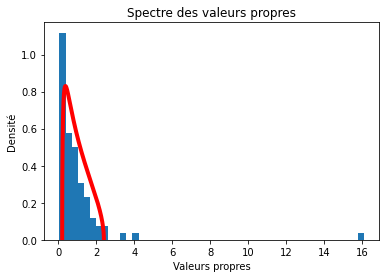

In [25]:
T, N = returns.shape # Pandas does the reverse of what I wrote in the first section
Q=T/N

correlation_matrix = log_in_sample.interpolate().corr()

compare_eigenvalue_distribution(correlation_matrix, Q)

In [38]:
correlation_matrix

,CAL,TMC,GLMD,PLAB,OPK,CLMT,ROSE,OPHC,DEA,SLAM,...,SSBK,CEAD,OB,THCH,TKR,HCNE,LMNL,DRMA,ALKT,KRO
CAL,1.000000,0.140647,-0.000879,0.536606,0.199994,0.246937,-0.060983,0.153592,0.052018,0.067965,...,0.001088,0.143260,0.317975,0.058199,0.475933,-0.022946,0.230825,0.087501,0.405846,0.261630
TMC,0.140647,1.000000,0.035954,0.105909,0.196810,0.199413,-0.133154,0.181013,0.111530,0.066402,...,-0.027170,0.052949,0.195283,-0.108352,0.211627,0.120667,0.124186,-0.034205,0.235689,0.133353
GLMD,-0.000879,0.035954,1.000000,0.023122,0.134831,0.139463,-0.022862,0.143266,-0.085807,0.147697,...,0.112895,0.103988,0.136581,0.131344,0.027695,0.068241,0.211187,0.207399,0.170212,0.036009
PLAB,0.536606,0.105909,0.023122,1.000000,0.329003,0.270170,-0.043873,0.123853,0.189126,0.132652,...,0.131440,0.179933,0.351374,0.079757,0.463995,-0.012277,0.143471,0.145805,0.448703,0.345263
OPK,0.199994,0.196810,0.134831,0.329003,1.000000,0.142245,-0.067585,0.165320,0.121169,0.066354,...,0.112137,0.058290,0.382868,0.057622,0.255967,0.201951,0.298602,0.046761,0.400609,0.105454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCNE,-0.022946,0.120667,0.068241,-0.012277,0.201951,0.011452,-0.025774,-0.192816,0.072164,-0.012223,...,0.054875,-0.044116,0.043297,-0.090954,0.034819,1.000000,0.041004,-0.107184,0.027146,-0.015818
LMNL,0.230825,0.124186,0.211187,0.143471,0.298602,0.088014,-0.017267,0.136420,-0.018929,0.187003,...,0.198717,0.034423,0.369300,0.118588,0.124344,0.041004,1.000000,0.204621,0.296772,0.067693
DRMA,0.087501,-0.034205,0.207399,0.145805,0.046761,0.052064,0.036007,0.093034,-0.090775,-0.005847,...,0.216669,0.136884,0.121028,0.035090,0.058310,-0.107184,0.204621,1.000000,0.075465,0.022372
ALKT,0.405846,0.235689,0.170212,0.448703,0.400609,0.196495,-0.070954,0.106627,0.208996,0.194926,...,0.125174,0.117541,0.452551,0.123976,0.361005,0.027146,0.296772,0.075465,1.000000,0.231391


Text(0, 0.5, "Numéro de l'actif")

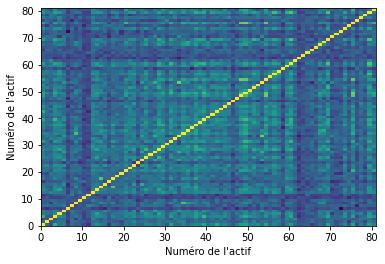

In [40]:
plt.pcolormesh(correlation_matrix
                )
plt.xlabel('Numéro de l\'actif')
plt.ylabel('Numéro de l\'actif')